# INF5007 Neural Networks / Neuroniniai tinklai
**LAB4**

## HOMEWORK TASK

Create a Multilayer Perceptron network for prediction from one of the following datasets:
1. Predict house prices: https://www.kaggle.com/datasets/shree1992/housedata
2. Predict student grades: https://www.kaggle.com/datasets/dipam7/student-grade-prediction
3. Predict flight prices: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
4. Any other dataset, which is suitable for prediction task.

Your Notebook/script must have the following parts:
1. Data exploration (visualizing data, describing what values will be used for training, what is the target of the prediction, etc.);
2. Data preparation (fill empty values, remove outliers, check the correlations);
3. Split the data into train and test sets;
4. Neural network - try at least three different structures and see which one is the best for learning;
5. Model evaluation (MSE, MAE, etc.) - at leas two evaluation methods.

# Prediction with Multilayer Perceptron (MLP)

In this lab we will learn how to predict values using Keras deep learing library and the Boston housing dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

plt.style.use('seaborn')

## Load and explore Boston housing dataset

In [2]:
#https://stackoverflow.com/questions/73252971/what-happened-to-sklearn-datasets-load-boston
#https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html

In [3]:
# For the dataset deprecation warning
import warnings
warnings.filterwarnings("ignore")


from sklearn.datasets import load_boston
boston = load_boston()

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
boston = fetch_california_housing()

df = pd.DataFrame(boston.data, columns=boston['feature_names'])
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
y = boston.target
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

Uncomment if you want to read more about each variable in the dataframe

In [5]:
#print(boston.DESCR)

### Check for the NULL values

In [6]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [7]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


## Train/Test split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [9]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15961,3.1908,52.0,5.000000,1.014184,879.0,3.117021,37.71,-122.43
1771,3.6094,42.0,4.900990,0.957096,971.0,3.204620,37.95,-122.35
16414,2.6250,16.0,8.333333,1.666667,20.0,3.333333,37.90,-121.24
5056,1.5143,34.0,3.805981,1.149526,3538.0,2.580598,34.02,-118.35
8589,7.3356,38.0,5.894904,1.057325,750.0,2.388535,33.89,-118.39
...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16


In [10]:
y_train

array([2.556, 1.146, 1.375, ..., 1.048, 1.407, 1.26 ])

## Standardisation

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_x_train = scaler.fit_transform(X_train)
normalized_x_test = scaler.transform(X_test)

In [12]:
normalized_x_train

array([[-0.36232605,  1.85890297, -0.16877334, ...,  0.00190139,
         0.97229046, -1.42250942],
       [-0.14102329,  1.06434823, -0.20665523, ...,  0.00945496,
         1.08459626, -1.38265919],
       [-0.66144956, -1.0014941 ,  1.10658361, ...,  0.02055372,
         1.06119922, -0.8297373 ],
       ...,
       [-1.45044201,  1.06434823, -0.21055978, ..., -0.03879603,
        -0.79652586,  0.65468363],
       [-0.65764311, -1.47822694, -0.17198179, ..., -0.02771272,
        -0.89011402,  1.20262424],
       [-0.83136525,  0.50815991, -0.31396782, ..., -0.04378624,
         1.00972573, -1.30794002]])

## Define the Neural Network

In [13]:
normalized_x_train[0].shape

(8,)

In [14]:
#from keras.models import Sequential
#from keras import layers

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

np.random.seed(1337)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape = normalized_x_train[0].shape))
    model.add(Dense(64, activation="relu", name="layer1"))
    model.add(Dense(64, activation="relu", name="layer2"))
    model.add(Dense(1, activation = "linear", name="layer3"))
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                576       
_________________________________________________________________
layer2 (Dense)               (None, 64)                4160      
_________________________________________________________________
layer3 (Dense)               (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


## Train the Neural Network

In [15]:
# Clear any logs from previous runs
!rm -rf ./logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
import datetime

model.compile(
    optimizer = "rmsprop", 
    loss = "mse", 
    metrics = ["mae"])

# Tensorboard logs dir
#log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


#history = model.fit(normalized_x_train, y_train, epochs = 100, batch_size=5,verbose=0,validation_data=(normalized_x_test, y_test),callbacks=[tensorboard_callback])

history = model.fit(normalized_x_train, y_train, epochs = 100, batch_size=5,verbose=0,validation_data=(normalized_x_test, y_test))

#### Launch tensorboard

In [17]:
%load_ext tensorboard

##### Run command in terminal instead of notebook

In [18]:
#!tensorboard --logdir=logs

### Plot Training and Validations MAE and loss

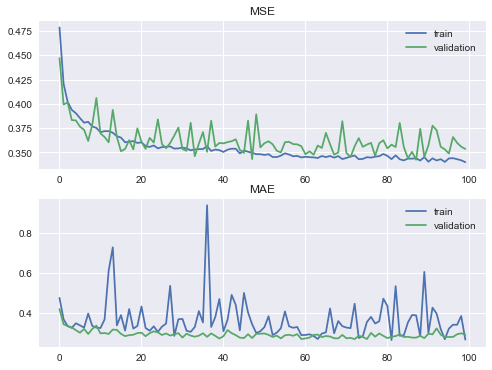

In [19]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

train_mae = history.history['mae']
val_mae = history.history['val_mae']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_mae, label='train')
ax1.plot(val_mae, label='validation')
ax1.set_title("MSE")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("MAE")

ax1.legend()
ax2.legend();

## Evaluate model using Cross validation

In [20]:
from sklearn.model_selection import KFold
from tqdm import tqdm

X = scaler.fit_transform(df)
kf = KFold(n_splits=5)
history_dict = {}
scores = []

for index, (train_index, test_index) in tqdm(enumerate(kf.split(X))):
    normalized_x_train, normalized_x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_model()
    model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
    
    #log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    #tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    #history = model.fit(normalized_x_train, y_train, epochs = 30, batch_size=5,verbose=0,validation_data=(normalized_x_test, y_test),callbacks=[tensorboard_callback])
    history = model.fit(normalized_x_train, y_train, epochs = 30, batch_size=5,verbose=0,validation_data=(normalized_x_test, y_test))
    history_dict[index] = history

    scores.append(model.evaluate(normalized_x_test, y_test, verbose=0))

2it [07:55, 234.25s/it]

KeyboardInterrupt: 

In [ ]:
mean_loss = np.mean([score[0] for score in scores])
mean_mae = np.mean([score[1] for score in scores])

print(f"Loss evaluation = {mean_loss}")
print(f"MAE evaluation = {mean_mae}")

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

for model in history_dict.keys():
    val_mae = history_dict.get(model).history['val_mae']
    val_loss = history_dict.get(model).history['val_loss']

    ax1.plot(val_mae, label=f'MAE_{model}')
    ax1.set_title("Mean Absolute Error")

    ax2.plot(val_loss, label=f'loss_{model}')
    ax2.set_title("Loss")

ax1.legend()
ax2.legend();